In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [46]:
portfolio3 = pd.read_csv('estaticos_portfolio3.csv')
market_media = pd.read_csv('market_media.csv')
portfolio1 = pd.read_csv('estaticos_portfolio1.csv')
portfolio2 = pd.read_csv('estaticos_portfolio2.csv')
market = pd.read_csv('estaticos_market.csv')

In [47]:
portfolio1 = portfolio1.drop(['Unnamed: 0'], axis = 1)
portfolio2 = portfolio2.drop(['Unnamed: 0'], axis = 1)
portfolio3 = portfolio3.drop(['Unnamed: 0'], axis = 1)
market_media = market_media.drop(['Unnamed: 0'], axis = 1)
market = market.drop(['Unnamed: 0'], axis = 1)

In [48]:
print('Shape do Portfolio1 é', portfolio1.shape)
print('Shape do Portfolio2 é', portfolio2.shape)
print('Shape do Portfolio3 é', portfolio3.shape)
print('Shape do Market_media é', market_media.shape)
print('Shape do Market é', market.shape)

Shape do Portfolio1 é (555, 181)
Shape do Portfolio2 é (566, 1)
Shape do Portfolio3 é (265, 1)
Shape do Market_media é (462298, 40)
Shape do Market é (462298, 181)


In [355]:
market.dt_situacao.nunique()

7334

In [9]:
pd.set_option('display.max_columns', 500)

In [52]:
market_media[(market_media['idade_media_socios'] < 18) | (market_media['idade_media_socios'] > 70)].shape

(7448, 40)

In [55]:
market_media_ajuste = market_media.copy()

In [58]:
market_media.describe()

,idade_empresa_anos,fl_rm,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
count,462298.000000,462298.000000,460371.000000,460371.000000,417022.000000,318469.000000,347207.000000,310696.000000,145029.000000,4.347850e+05,4.347850e+05,462298.000000
mean,9.948677,0.487822,3.591801,48.699177,25.007247,1308.005725,1.496326,42.816452,1.107117,8.020911e+05,3.367205e+08,28.737044
std,9.615664,0.499852,72.600352,1206.696804,9.679799,1161.889222,3.276626,12.626447,0.840194,3.099979e+07,7.114614e+09,468.626094
min,0.016438,0.000000,0.000000,0.000000,0.000000,100.000000,1.000000,-2.000000,1.000000,0.000000e+00,4.104703e+04,0.000000
25%,2.756164,0.000000,0.000000,0.000000,22.000000,673.230000,1.000000,33.000000,1.000000,1.648512e+05,1.854576e+05,0.000000
50%,6.704110,0.000000,0.000000,0.000000,23.000000,946.680000,1.000000,42.000000,1.000000,2.100000e+05,2.100000e+05,0.000000
75%,14.465753,1.000000,0.000000,0.000000,25.000000,1518.080000,2.000000,51.000000,1.000000,2.100000e+05,2.100000e+05,0.000000
max,106.432877,1.000000,9782.000000,122090.000000,66.000000,75093.840000,246.000000,127.000000,140.000000,1.454662e+10,2.227618e+11,9647.000000


In [114]:
market_media_ajuste = market_media.copy()

## Trocando os valores indevidos da idade

In [115]:
market_media_ajuste['idade_media_socios'].fillna(0, inplace=True)

In [116]:
def troca_media_idade(dado):
    if dado==0:
        return 42.816452
    elif dado < 18:
        return 18
    elif dado > 70:
        return 70
    else:
        return dado

In [119]:
market_media_ajuste['idade_media_socios'] = market_media_ajuste['idade_media_socios'].apply(troca_media_idade)

In [120]:
market_media_ajuste.shape

(462298, 40)

## Pré-Processamento

In [122]:
market_clean = market_media_ajuste.copy()

In [123]:
market_clean['fl_email'] = market_clean['fl_email'].astype(bool)
market_clean['fl_ltda'] = market_clean['fl_ltda'].astype(bool)
market_clean['fl_matriz'] = market_clean['fl_matriz'].astype(bool)
market_clean['fl_me'] = market_clean['fl_me'].astype(bool)
market_clean['fl_mei'] = market_clean['fl_mei'].astype(bool)
market_clean['fl_optante_simples'] = market_clean['fl_optante_simples'].astype(bool)
market_clean['fl_passivel_iss'] = market_clean['fl_passivel_iss'].astype(bool)
market_clean['fl_rm'] = market_clean['fl_rm'].astype(bool)
market_clean['fl_sa'] = market_clean['fl_sa'].astype(bool)
market_clean['fl_st_especial'] = market_clean['fl_st_especial'].astype(bool)
market_clean['fl_telefone'] = market_clean['fl_telefone'].astype(bool)

In [124]:
market_clean.isna().sum()

id                                            0
fl_matriz                                     0
de_natureza_juridica                          0
sg_uf                                         0
natureza_juridica_macro                       0
de_ramo                                       0
setor                                      1927
idade_empresa_anos                            0
idade_emp_cat                                 0
fl_me                                         0
fl_sa                                         0
fl_mei                                        0
fl_ltda                                       0
dt_situacao                                   6
fl_st_especial                                0
fl_email                                      0
fl_telefone                                   0
fl_rm                                         0
nm_divisao                                 1927
nm_segmento                                1927
fl_optante_simples                      

In [125]:
# Preenchendo os valores NaN's numericos
for i in market_clean.select_dtypes(['int64','float64']).columns:
    market_clean[i] = market_clean[i].fillna(market_clean[i].mean())

In [126]:
market_clean.isna().sum()

id                                           0
fl_matriz                                    0
de_natureza_juridica                         0
sg_uf                                        0
natureza_juridica_macro                      0
de_ramo                                      0
setor                                     1927
idade_empresa_anos                           0
idade_emp_cat                                0
fl_me                                        0
fl_sa                                        0
fl_mei                                       0
fl_ltda                                      0
dt_situacao                                  6
fl_st_especial                               0
fl_email                                     0
fl_telefone                                  0
fl_rm                                        0
nm_divisao                                1927
nm_segmento                               1927
fl_optante_simples                           0
vl_total_veic

In [127]:
fill_dict = market_clean.dtypes.to_dict()

In [128]:
for feature in fill_dict:
    if(fill_dict[feature] == bool):
        fill_dict[feature] = False
    elif(fill_dict[feature] == object):
        fill_dict[feature] = 'other'

In [129]:
market_clean.fillna(value=fill_dict, inplace=True)

In [130]:
market_clean.isna().sum()

id                                       0
fl_matriz                                0
de_natureza_juridica                     0
sg_uf                                    0
natureza_juridica_macro                  0
de_ramo                                  0
setor                                    0
idade_empresa_anos                       0
idade_emp_cat                            0
fl_me                                    0
fl_sa                                    0
fl_mei                                   0
fl_ltda                                  0
dt_situacao                              0
fl_st_especial                           0
fl_email                                 0
fl_telefone                              0
fl_rm                                    0
nm_divisao                               0
nm_segmento                              0
fl_optante_simples                       0
vl_total_veiculos_pesados_grupo          0
vl_total_veiculos_leves_grupo            0
sg_uf_matri

In [131]:
market_clean.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_optante_simples,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,idade_media_socios,qt_socios_feminino,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,False,False,False,2005-03-25,False,True,True,True,CONSTRUCAO DE EDIFICIOS,CONSTRUCAO,True,0.0,0.0,RN,VERDE,ACIMA DE 1 ANO,23.0,ALTA,1308.005725,LESTE POTIGUAR,NATAL,True,2.0,44.000000,1.107117,"DE R$ 1.500.000,01 A R$ 4.800.000,00","DE R$ 1.500.000,01 A R$ 4.800.000,00",3132172.8,3132172.8,0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,False,False,True,False,2017-05-12,False,True,True,True,ALIMENTACAO,ALOJAMENTO E ALIMENTACAO,True,0.0,0.0,PI,CINZA,ATE 1 ANO,9.0,BAIXA,468.930000,CENTRO NORTE PIAUIENSE,TERESINA,True,1.0,27.000000,1.107117,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,False,False,True,False,2011-09-26,False,False,True,True,TRANSPORTE TERRESTRE,TRANSPORTE ARMAZENAGEM E CORREIO,True,0.0,0.0,AM,AMARELO,ACIMA DE 1 ANO,26.0,MEDIA,713.500000,CENTRO AMAZONENSE,MANAUS,True,1.0,32.000000,1.107117,"ATE R$ 81.000,00","ATE R$ 81.000,00",50000.0,50000.0,0
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,False,False,False,False,2012-04-25,False,True,True,True,REPARACAO E MANUTENCAO DE EQUIPAMENTOS DE INFO...,OUTRAS ATIVIDADES DE SERVICOS,True,0.0,0.0,AM,AMARELO,ACIMA DE 1 ANO,26.0,MEDIA,475.730000,CENTRO AMAZONENSE,MANAUS,True,1.0,36.000000,1.107117,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,False,False,False,False,2015-08-17,False,True,True,True,SERVICOS DE ARQUITETURA E ENGENHARIA TESTES E ...,ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS,True,0.0,0.0,RN,VERDE,ACIMA DE 1 ANO,27.0,ALTA,2874.040000,LESTE POTIGUAR,NATAL,True,1.0,42.816452,1.107117,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0


## Padronizando

In [132]:
from sklearn.preprocessing import StandardScaler

In [133]:
market_fusao_2 = market_clean.copy()

In [134]:
market_fusao_2 = market_fusao_2.reset_index()

In [135]:
market_fusao_2.drop('index',axis=1,inplace=True)

In [136]:
# Padronizando os dados
market_dummies_stdscaler = StandardScaler().fit_transform(market_fusao_2.select_dtypes(['float64','int64']))
market_dummies_stdscaler = pd.DataFrame(market_dummies_stdscaler)
colunas_int_float = market_fusao_2.select_dtypes(['float64','int64']).columns

market_dummies_stdscaler.columns = colunas_int_float

market_dummies_stdscaler = pd.concat([market_dummies_stdscaler, market_fusao_2.select_dtypes(['bool','object'])], axis=1)

In [137]:
market_dummies_stdscaler.shape

(462298, 40)

In [138]:
market_dummies_stdscaler.head()

,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_emp_cat,fl_me,fl_sa,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_optante_simples,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo
0,0.468908,-0.049577,-0.040442,-0.218332,3.206583e-14,0.177374,0.128755,0.0,0.077506,-0.048349,-0.061322,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,10 a 15,False,False,False,False,2005-03-25,False,True,True,True,CONSTRUCAO DE EDIFICIOS,CONSTRUCAO,True,RN,VERDE,ACIMA DE 1 ANO,ALTA,LESTE POTIGUAR,NATAL,True,"DE R$ 1.500.000,01 A R$ 4.800.000,00","DE R$ 1.500.000,01 A R$ 4.800.000,00"
1,-0.882484,-0.049577,-0.040442,-1.741135,-8.700907e-01,-0.174786,-1.571173,0.0,-0.019695,-0.048772,-0.061322,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1 a 5,False,False,True,False,2017-05-12,False,True,True,True,ALIMENTACAO,ALOJAMENTO E ALIMENTACAO,True,PI,CINZA,ATE 1 ANO,BAIXA,CENTRO NORTE PIAUIENSE,TERESINA,True,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00"
2,-0.296966,-0.049577,-0.040442,0.107983,-6.164806e-01,-0.174786,-1.071194,0.0,-0.025017,-0.048795,-0.061322,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,5 a 10,False,False,True,False,2011-09-26,False,False,True,True,TRANSPORTE TERRESTRE,TRANSPORTE ARMAZENAGEM E CORREIO,True,AM,AMARELO,ACIMA DE 1 ANO,MEDIA,CENTRO AMAZONENSE,MANAUS,True,"ATE R$ 81.000,00","ATE R$ 81.000,00"
3,-0.357370,-0.049577,-0.040442,0.107983,-8.630394e-01,-0.174786,-0.671211,0.0,-0.019695,-0.048772,-0.061322,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,5 a 10,False,False,False,False,2012-04-25,False,True,True,True,REPARACAO E MANUTENCAO DE EQUIPAMENTOS DE INFO...,OUTRAS ATIVIDADES DE SERVICOS,True,AM,AMARELO,ACIMA DE 1 ANO,MEDIA,CENTRO AMAZONENSE,MANAUS,True,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00"
4,-0.701843,-0.049577,-0.040442,0.216755,1.623920e+00,-0.174786,0.010406,0.0,-0.019695,-0.048772,-0.061322,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,1 a 5,False,False,False,False,2015-08-17,False,True,True,True,SERVICOS DE ARQUITETURA E ENGENHARIA TESTES E ...,ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS,True,RN,VERDE,ACIMA DE 1 ANO,ALTA,LESTE POTIGUAR,NATAL,True,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00"


In [139]:
market_clean_noId = market_dummies_stdscaler.drop('id',axis=1)

## LabelEnconder

In [140]:
categoricas = market_clean_noId.columns[market_clean_noId.dtypes == object]
nao_categoricas = market_clean_noId.columns[market_clean_noId.dtypes != object]
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
market_clean_le = pd.DataFrame()
market_clean_le[categoricas] = market_clean_noId[categoricas].apply(lambda col: le.fit_transform(col))
market_clean_enconded = pd.concat([market_clean_noId[nao_categoricas],market_clean_le], axis =1)

In [141]:
market_clean_enconded.dtypes

idade_empresa_anos                       float64
vl_total_veiculos_pesados_grupo          float64
vl_total_veiculos_leves_grupo            float64
nu_meses_rescencia                       float64
empsetorcensitariofaixarendapopulacao    float64
qt_socios                                float64
idade_media_socios                       float64
qt_socios_feminino                       float64
vl_faturamento_estimado_aux              float64
vl_faturamento_estimado_grupo_aux        float64
qt_filiais                               float64
fl_matriz                                   bool
fl_me                                       bool
fl_sa                                       bool
fl_mei                                      bool
fl_ltda                                     bool
fl_st_especial                              bool
fl_email                                    bool
fl_telefone                                 bool
fl_rm                                       bool
fl_optante_simples  

In [142]:
# Convertendo as colunas bool em valores 1 e 0    
for i in market_clean_enconded.select_dtypes(bool).columns:
    market_clean_enconded[i] = np.where(market_clean_enconded[i] == True, 1,0)

In [143]:
market_clean_enconded.shape

(462298, 39)

In [144]:
market_clean_enconded.describe()

,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais,fl_matriz,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,fl_optante_simples,fl_passivel_iss,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_emp_cat,dt_situacao,nm_divisao,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo
count,4.622980e+05,4.622980e+05,4.622980e+05,4.622980e+05,4.622980e+05,4.622980e+05,4.622980e+05,4.622980e+05,4.622980e+05,4.622980e+05,4.622980e+05,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.00000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000
mean,3.297566e-16,3.737208e-15,-1.080597e-16,1.206164e-15,-3.793547e-15,-6.716026e-16,-1.321112e-15,-8.323592e-16,2.080220e-15,7.817816e-15,-8.093637e-15,0.937127,0.002628,0.018239,0.326413,0.002687,0.000147,0.445751,0.725653,0.487822,0.61071,0.576831,25.368922,2.693442,4.152696,12.867036,2.428823,2.238026,4825.563933,35.133792,10.293408,12.133842,2.250663,0.506422,1.235606,8.456463,41.529767,7.682363,7.359413
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0.242734,0.051198,0.133816,0.468901,0.051763,0.012127,0.497049,0.446185,0.499852,0.48759,0.494062,18.805287,1.412396,1.323293,9.777025,1.430500,1.837414,1659.513642,22.644249,4.414365,6.988214,1.706502,1.297078,1.002345,5.783442,23.394256,3.832492,3.832758
min,-1.032924e+00,-4.957709e-02,-4.044185e-02,-2.720079e+00,-1.252658e+00,-1.747865e-01,-2.471135e+00,-2.276209e-01,-2.668021e-02,-4.879659e-02,-6.132197e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.480003e-01,-4.957709e-02,-4.044185e-02,-3.271032e-01,-5.405334e-01,-1.747865e-01,-5.712151e-01,-2.276209e-01,-2.051127e-02,-4.877211e-02,-6.132197e-02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,17.000000,2.000000,3.000000,5.000000,1.000000,0.000000,3001.000000,28.000000,9.000000,9.000000,1.000000,0.000000,0.000000,4.000000,27.000000,7.000000,3.000000
50%,-3.374255e-01,-4.957709e-02,-4.044185e-02,-2.183315e-01,3.206583e-14,-1.747865e-01,1.040564e-02,0.000000e+00,-1.969491e-02,-4.877211e-02,-6.132197e-02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.00000,1.000000,17.000000,3.000000,5.000000,5.000000,2.000000,3.000000,4947.000000,30.000000,9.000000,16.000000,2.000000,0.000000,2.000000,8.000000,43.000000,10.000000,10.000000
75%,4.697628e-01,-4.957709e-02,-4.044185e-02,3.864345e-16,3.206583e-14,2.345859e-16,3.287470e-01,0.000000e+00,-1.969491e-02,-4.876670e-02,-6.132197e-02,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,17.000000,4.000000,5.000000,22.000000,4.000000,4.000000,6351.000000,36.000000,13.000000,19.000000,4.000000,0.000000,2.000000,12.000000,60.000000,10.000000,10.000000
max,1.003408e+01,1.349699e+02,1.013482e+02,4.458849e+00,7.651320e+01,8.610450e+01,2.728646e+00,2.951452e+02,4.838423e+02,3.223715e+01,2.052441e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,66.000000,5.000000,6.000000,32.000000,5.000000,5.000000,7334.000000,87.000000,21.000000

In [145]:
market_clean_enconded.head()

,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais,fl_matriz,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,fl_optante_simples,fl_passivel_iss,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_emp_cat,dt_situacao,nm_divisao,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo
0,0.468908,-0.049577,-0.040442,-0.218332,3.206583e-14,0.177374,0.128755,0.0,0.077506,-0.048349,-0.061322,1,0,0,0,0,0,1,1,1,1,1,60,4,2,11,2,1,2709,32,10,19,4,0,0,6,48,2,2
1,-0.882484,-0.049577,-0.040442,-1.741135,-8.700907e-01,-0.174786,-1.571173,0.0,-0.019695,-0.048772,-0.061322,1,0,0,1,0,0,1,1,1,1,1,17,3,5,21,4,0,6811,3,3,16,2,1,1,4,69,10,10
2,-0.296966,-0.049577,-0.040442,0.107983,-6.164806e-01,-0.174786,-1.071194,0.0,-0.025017,-0.048795,-0.061322,1,0,0,1,0,0,0,1,1,1,1,17,1,5,32,4,3,4783,86,20,2,0,0,2,2,43,1,1
3,-0.357370,-0.049577,-0.040442,0.107983,-8.630394e-01,-0.174786,-0.671211,0.0,-0.019695,-0.048772,-0.061322,1,0,0,0,0,0,1,1,1,1,1,17,1,5,25,4,3,4994,74,17,2,0,0,2,2,43,10,10
4,-0.701843,-0.049577,-0.040442,0.216755,1.623920e+00,-0.174786,0.010406,0.0,-0.019695,-0.048772,-0.061322,1,0,0,0,0,0,1,1,1,1,1,17,4,5,27,4,0,6183,77,8,19,4,0,0,6,48,10,10


In [146]:
market_clean_enconded['id'] = market_dummies_stdscaler['id']

## Analisando se os ids estão presentes nos 3 portfólios, se está só em 2 ou só em 1 portfólio

# Merge nos portfólios  com o market

In [147]:
df_portfolio1 = pd.merge(portfolio1.id, market_clean_enconded, on='id')
df_portfolio2 = pd.merge(portfolio2, market_clean_enconded, on='id')
df_portfolio3 = pd.merge(portfolio3, market_clean_enconded, on='id')

In [148]:
port1 = list(df_portfolio1['id'])
port2 = list(df_portfolio2['id'])
port3 = list(df_portfolio3['id'])

In [149]:
port1_port2 = [x for x in port1 if x in port2]
port1_port3 = [x for x in port1 if x in port3]
port2_port3 = [x for x in port2 if x in port3]
port1_port2_port3 = [x for x in port1 if x in port2 and port3]

In [150]:
print(f"Port1 and Port2: {len(port1_port2)}")
print(f"Port1 and Port3: {len(port1_port3)}")
print(f"Port2 and Port3: {len(port2_port3)}")
print(f"Port1, Port2 and Port3: {len(port1_port2_port3)}")

Port1 and Port2: 0
Port1 and Port3: 0
Port2 and Port3: 108
Port1, Port2 and Port3: 0


# Pegando os ids do Market que não estão em nenhum portfólio

In [151]:
df = pd.concat([df_portfolio1,df_portfolio2,df_portfolio3], axis=0)
df = pd.DataFrame(df.id)

In [152]:
df.shape

(1386, 1)

In [153]:
df2 = market_clean_enconded

In [154]:
df2.shape

(462298, 40)

In [155]:
merge_not = df2[~df2['id'].isin(df['id'])]

In [156]:
merge_not.shape

(461020, 40)

#### Tirando uma amostra do portfólio 1 para depois colocar na base de teste para verificar se serão recomendados para o portfólio 1

In [256]:
df_portfolio1.shape

(555, 40)

In [257]:
df_portfolio1_part = df_portfolio1[0:97]

In [258]:
amostra_port1 = df_portfolio1[487:]

## Criando um portfólio 4 que será os ids que estão no portfólio 2 e 3

In [259]:
portfolio4 = pd.DataFrame(port2_port3, columns = ['id'])

In [260]:
portfolio4.head()

,id
0,16843c9ffb920170477118933798510d8d5f00f5c56c12...
1,3aafa3a1f12f483740a52956af100223333d0e3c79bf2c...
2,c60431fbca90067f105570e1e8a684bcd7048205bbf6c4...
3,2206453fbc92af65e47ce6ee2be27fa90ac427845ea0a5...
4,4b03e2427c4d2782f21a03f4336f613709f6c0b51f6b75...


In [261]:
df_portfolio4 =pd.merge(portfolio4, market_clean_enconded, on='id')

In [262]:
df_portfolio4.shape

(108, 40)

#### Tirando uma amostra do portfólio 4 para depois colocar na base de teste para verificar se serão recomendados para o portfólio 4

In [263]:
df_portfolio4.shape

(108, 40)

In [264]:
df_portfolio4_part = df_portfolio4[0:97]

In [265]:
amostra_port4 = df_portfolio4[97:]

## Tirando o portfólio 4 do portfólio 2

In [266]:
df_portfolio2_without4 = df_portfolio2[~df_portfolio2['id'].isin(df_portfolio4['id'])]

#### Tirando uma amostra do portfólio 2 para depois colocar na base de teste para verificar se serão recomendados para o portfólio 2

In [271]:
df_portfolio2_without4.shape

(458, 40)

In [272]:
df_portfolio2_part = df_portfolio2_without4[0:97]

In [273]:
amostra_port2 = df_portfolio2_without4[400:]

## Tirando o portfólio 4 do portfólio 3

In [274]:
df_portfolio3_without4 = df_portfolio3[~df_portfolio3['id'].isin(df_portfolio4['id'])]

#### Tirando uma amostra do portfólio 3 para depois colocar na base de teste para verificar se serão recomendados para o portfólio 3

In [276]:
df_portfolio3_without4.shape

(157, 40)

In [277]:
df_portfolio3_part = df_portfolio3_without4[0:97]

In [278]:
amostra_port3 = df_portfolio3_without4[100:]

## Fazendo cluster para ver a relação deles

In [279]:
df_all_port_noTarget = pd.concat([df_portfolio1_part, df_portfolio2_part, df_portfolio3_part, df_portfolio4_part],axis=0)

In [280]:
df_all_port_noTarget.head()

,id,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais,fl_matriz,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,fl_optante_simples,fl_passivel_iss,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_emp_cat,dt_situacao,nm_divisao,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo
0,dabe79bec87c88ae04e869bf6bd321ee5e1893cecf6625...,-0.967391,-0.049577,-0.040442,3.864345e-16,-0.962349,-1.747865e-01,0.228751,0.000000,-0.019695,-0.048772,-0.061322,1,0,0,1,0,0,0,0,0,1,0,17,3,5,5,1,4,7108,30,9,16,2,4,1,14,61,10,10
1,32e5f4e10932153a7ba869cb0386e7e02d49d2461046b8...,-0.349677,-0.049577,-0.040442,-3.271032e-01,0.578215,2.345859e-16,0.010406,0.000000,-0.019695,-0.048657,-0.052786,0,0,0,0,0,0,1,1,0,0,0,17,2,5,5,1,3,4967,30,9,9,4,0,2,3,44,10,7
2,a95d6f30bba445bd3d6b0c5b36f865b38ec01d17336090...,-0.201517,-0.049577,-0.040442,-1.095599e-01,-0.528733,-1.747865e-01,1.128713,-0.227621,-0.025017,-0.048795,-0.061322,1,0,0,1,0,0,0,0,1,1,0,17,2,5,5,1,3,4451,30,9,9,1,0,2,8,0,1,1
3,6cb309685cea0b6d2988818792ec2e6fcb2bd02e0afa9e...,1.135059,-0.049577,-0.040442,1.079834e-01,-0.725393,-1.747865e-01,-0.271228,0.000000,-0.025017,-0.048795,-0.061322,1,0,0,0,0,0,0,0,0,1,0,17,4,5,5,1,5,2901,30,9,19,4,0,0,11,70,1,1
4,f72aa7fa6787b0a5a1c88885b6120850df8ee0f71adc25...,0.912819,-0.049577,-0.040442,-2.183315e-01,-0.443090,1.773739e-01,-0.971198,-0.227621,0.074079,-0.047951,-0.054920,1,0,0,0,0,0,1,1,1,1,0,60,4,2,5,1,2,2901,30,9,19,4,0,0,6,48,2,8


In [281]:
df_all_port_noTarget_id = df_all_port_noTarget.copy()

In [282]:
df_all_port_noTarget_id.set_index('id',inplace=True)

In [283]:
df_all_port_noTarget_id.head()

,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais,fl_matriz,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,fl_optante_simples,fl_passivel_iss,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_emp_cat,dt_situacao,nm_divisao,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
dabe79bec87c88ae04e869bf6bd321ee5e1893cecf66255be9ea861a9e5841a9,-0.967391,-0.049577,-0.040442,3.864345e-16,-0.962349,-1.747865e-01,0.228751,0.000000,-0.019695,-0.048772,-0.061322,1,0,0,1,0,0,0,0,0,1,0,17,3,5,5,1,4,7108,30,9,16,2,4,1,14,61,10,10
32e5f4e10932153a7ba869cb0386e7e02d49d2461046b866411556d2af150702,-0.349677,-0.049577,-0.040442,-3.271032e-01,0.578215,2.345859e-16,0.010406,0.000000,-0.019695,-0.048657,-0.052786,0,0,0,0,0,0,1,1,0,0,0,17,2,5,5,1,3,4967,30,9,9,4,0,2,3,44,10,7
a95d6f30bba445bd3d6b0c5b36f865b38ec01d1733609095d359649cfedf15d1,-0.201517,-0.049577,-0.040442,-1.095599e-01,-0.528733,-1.747865e-01,1.128713,-0.227621,-0.025017,-0.048795,-0.061322,1,0,0,1,0,0,0,0,1,1,0,17,2,5,5,1,3,4451,30,9,9,1,0,2,8,0,1,1
6cb309685cea0b6d2988818792ec2e6fcb2bd02e0afa9e74532d5040fbc933b8,1.135059,-0.049577,-0.040442,1.079834e-01,-0.725393,-1.747865e-01,-0.271228,0.000000,-0.025017,-0.048795,-0.061322,1,0,0,0,0,0,0,0,0,1,0,17,4,5,5,1,5,2901,30,9,19,4,0,0,11,70,1,1
f72aa7fa6787b0a5a1c88885b6120850df8ee0f71adc251dfe8d321e9e6de7f5,0.912819,-0.049577,-0.040442,-2.183315e-01,-0.443090,1.773739e-01,-0.971198,-0.227621,0.074079,-0.047951,-0.054920,1,0,0,0,0,0,1,1,1,1,0,60,4,2,5,1,2,2901,30,9,19,4,0,0,6,48,2,8


In [284]:
from sklearn.cluster import KMeans

/home/luiz/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


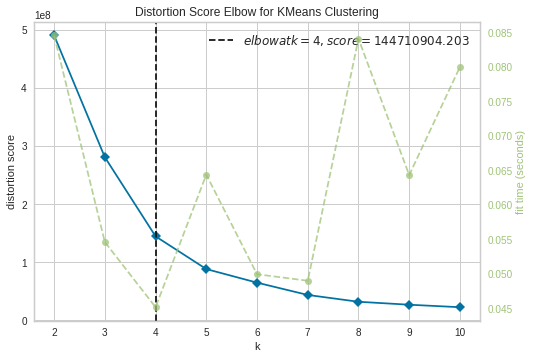

In [181]:
from yellowbrick.cluster import KElbowVisualizer
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model)

visualizer.fit(df_all_port_noTarget_id)        # Fit the data to the visualizer
visualizer.show()

In [285]:
#Instanciando o objeto
km = KMeans(4)

In [286]:
#Ajustando aos dados
km.fit(df_all_port_noTarget_id)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [287]:
X_train = df_all_port_noTarget_id.copy()

In [288]:
#Criando uma coluna com os resultados das predições
X_train['km'] = km.predict(df_all_port_noTarget_id)

In [289]:
#verificando se a coluna foi criada
X_train.columns

Index(['idade_empresa_anos', 'vl_total_veiculos_pesados_grupo',
       'vl_total_veiculos_leves_grupo', 'nu_meses_rescencia',
       'empsetorcensitariofaixarendapopulacao', 'qt_socios',
       'idade_media_socios', 'qt_socios_feminino',
       'vl_faturamento_estimado_aux', 'vl_faturamento_estimado_grupo_aux',
       'qt_filiais', 'fl_matriz', 'fl_me', 'fl_sa', 'fl_mei', 'fl_ltda',
       'fl_st_especial', 'fl_email', 'fl_telefone', 'fl_rm',
       'fl_optante_simples', 'fl_passivel_iss', 'de_natureza_juridica',
       'sg_uf', 'natureza_juridica_macro', 'de_ramo', 'setor', 'idade_emp_cat',
       'dt_situacao', 'nm_divisao', 'nm_segmento', 'sg_uf_matriz',
       'de_saude_tributaria', 'de_saude_rescencia', 'de_nivel_atividade',
       'nm_meso_regiao', 'nm_micro_regiao', 'de_faixa_faturamento_estimado',
       'de_faixa_faturamento_estimado_grupo', 'km'],
      dtype='object')

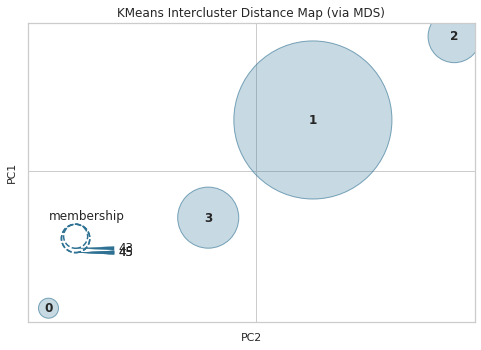

In [290]:
#Verificando as distancias entre os novos clusters criados
from sklearn.cluster import KMeans
from yellowbrick.cluster import InterclusterDistance

model = KMeans(4)
visualizer = InterclusterDistance(model)
visualizer.fit(X_train)    
visualizer.show()    

In [188]:
print("Acurácia de previsão:", accuracy_score(df_all_port['Target'], X_train['km']))

NameError: name 'accuracy_score' is not defined

In [291]:
from sklearn.decomposition import PCA

In [292]:
pca = PCA(n_components=2)

projected = pca.fit_transform(df_all_port_noTarget_id)

print(f"Original shape: {df_all_port_noTarget_id.shape}, projected shape: {projected.shape}")

Original shape: (388, 39), projected shape: (388, 2)


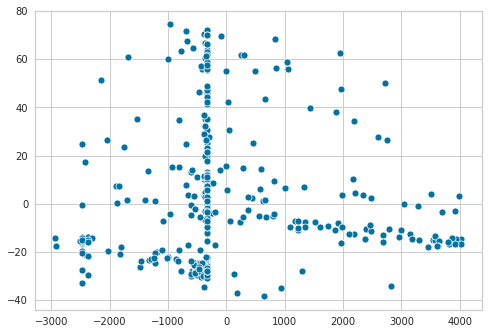

In [293]:
sns.scatterplot(projected[:, 0], projected[:, 1])

In [192]:
df_all_port_noTarget_id.describe()

,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais,fl_matriz,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,fl_optante_simples,fl_passivel_iss,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_emp_cat,dt_situacao,nm_divisao,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo
count,860.000000,860.000000,860.000000,860.000000,860.000000,8.600000e+02,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000
mean,0.748480,0.014060,-0.036383,-0.021492,0.065660,1.366406e-01,0.150501,0.190278,1.124464,-0.041173,-0.057655,0.966279,0.004651,0.024419,0.229070,0.003488,0.001163,0.470930,0.646512,0.469767,0.416279,0.504651,32.923256,2.633721,3.723256,7.323256,2.109302,2.947674,3900.015116,30.560465,8.418605,11.716279,2.567442,0.258140,0.786047,8.315116,41.837209,5.783721,5.637209
std,1.391742,0.293138,0.018075,0.871129,1.042819,1.711351e+00,0.989032,4.257626,3.911574,0.024556,0.028940,0.180615,0.068080,0.154435,0.420479,0.058994,0.034100,0.499445,0.478331,0.499376,0.493228,0.500269,20.079960,1.423085,1.623508,7.746127,1.365518,1.908454,1678.794112,19.928272,4.499554,7.013273,1.609448,0.938563,0.937284,5.838693,22.979345,3.570962,3.472293
min,-1.029220,-0.049577,-0.040442,-1.958678,-1.241977,-1.747865e-01,-2.471135,-0.227621,-0.026680,-0.048795,-0.061322,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.444129,-0.049577,-0.040442,-0.218332,-0.535527,-1.747865e-01,-0.092069,-0.227621,-0.019695,-0.048772,-0.061322,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,2.000000,2.000000,4.000000,1.000000,1.000000,2881.000000,30.000000,9.000000,9.000000,1.000000,0.000000,0.000000,4.000000,28.750000,3.000000,3.000000
50%,0.458936,-0.049577,-0.040442,-0.218332,-0.022897,2.345859e-16,0.010406,0.000000,-0.004918,-0.048613,-0.061322,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,17.000000,2.000000,5.000000,5.000000,1.000000,3.000000,2901.000000,30.000000,9.000000,9.000000,3.000000,0.000000,0.000000,8.000000,43.000000,5.000000,5.000000
75%,1.544067,-0.035774,-0.037951,-0.109560,0.047342,1.773739e-01,0.528739,0.000000,0.860104,-0.043974,-0.059188,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,60.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5331.500000,30.000000,9.000000,19.000000,4.000000,0.000000,2.000000,12.000000,57.000000,10.000000,10.000000
max,4.401708,5.223112,0.267652,3.153589,7.423687,4.842334e+01,2.728646,123.021456,68.787780,0.336733,0.736757,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,64.000000,5.000000,5.000000,32.000000,4.000000,5.000000,7322.000000,86.000000,20.000000,20.000000,6.000000,5.000000,4.000000,19.000000,73.000000,12.000000,11.000000


## Colocando uma coluna de target 0 para os que são do portfólio 1

In [294]:
df_portfolio1_part_target = df_portfolio1_part.copy()

In [295]:
df_portfolio1_part_target['Target'] = 0

In [296]:
df_portfolio1_part_target.head()

,id,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais,fl_matriz,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,fl_optante_simples,fl_passivel_iss,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_emp_cat,dt_situacao,nm_divisao,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,Target
0,dabe79bec87c88ae04e869bf6bd321ee5e1893cecf6625...,-0.967391,-0.049577,-0.040442,3.864345e-16,-0.962349,-1.747865e-01,0.228751,0.000000,-0.019695,-0.048772,-0.061322,1,0,0,1,0,0,0,0,0,1,0,17,3,5,5,1,4,7108,30,9,16,2,4,1,14,61,10,10,0
1,32e5f4e10932153a7ba869cb0386e7e02d49d2461046b8...,-0.349677,-0.049577,-0.040442,-3.271032e-01,0.578215,2.345859e-16,0.010406,0.000000,-0.019695,-0.048657,-0.052786,0,0,0,0,0,0,1,1,0,0,0,17,2,5,5,1,3,4967,30,9,9,4,0,2,3,44,10,7,0
2,a95d6f30bba445bd3d6b0c5b36f865b38ec01d17336090...,-0.201517,-0.049577,-0.040442,-1.095599e-01,-0.528733,-1.747865e-01,1.128713,-0.227621,-0.025017,-0.048795,-0.061322,1,0,0,1,0,0,0,0,1,1,0,17,2,5,5,1,3,4451,30,9,9,1,0,2,8,0,1,1,0
3,6cb309685cea0b6d2988818792ec2e6fcb2bd02e0afa9e...,1.135059,-0.049577,-0.040442,1.079834e-01,-0.725393,-1.747865e-01,-0.271228,0.000000,-0.025017,-0.048795,-0.061322,1,0,0,0,0,0,0,0,0,1,0,17,4,5,5,1,5,2901,30,9,19,4,0,0,11,70,1,1,0
4,f72aa7fa6787b0a5a1c88885b6120850df8ee0f71adc25...,0.912819,-0.049577,-0.040442,-2.183315e-01,-0.443090,1.773739e-01,-0.971198,-0.227621,0.074079,-0.047951,-0.054920,1,0,0,0,0,0,1,1,1,1,0,60,4,2,5,1,2,2901,30,9,19,4,0,0,6,48,2,8,0


## Colocando uma coluna de target 1 para os que são do portfólio 2

In [297]:
df_portfolio2_part_target = df_portfolio2_part.copy()

In [298]:
df_portfolio2_part_target['Target'] = 1

In [299]:
df_portfolio2_part_target.head()

,id,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais,fl_matriz,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,fl_optante_simples,fl_passivel_iss,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_emp_cat,dt_situacao,nm_divisao,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,Target
0,09e95c1a84049001d086470a8f320a19b076f955a89122...,0.134693,-0.049577,-0.037120,-0.218332,1.537966,2.345859e-16,0.010406,0.000000,10.866629,-0.001338,-0.061322,1,0,0,0,0,0,1,1,0,0,1,1,0,0,0,4,1,3409,0,0,0,4,0,0,17,57,6,6,1
1,dc9d155f5bcd3172031e2ec9431786e8871ff4b0ff4728...,3.519299,0.171269,-0.023833,-0.218332,-0.311230,2.345859e-16,0.010406,0.000000,5.854370,-0.023178,-0.061322,1,0,0,0,0,0,0,0,1,0,1,33,4,5,0,4,5,2618,0,0,19,4,0,0,0,1,4,4,1
3,ff045934d90aab184dd15e66daf3b3c97193bda5449298...,3.091059,-0.049577,-0.040442,-0.218332,0.092771,2.345859e-16,0.010406,0.000000,7.341769,-0.016697,-0.059188,1,0,0,0,0,0,0,0,0,0,1,33,1,5,0,4,5,2870,0,0,2,4,0,0,13,6,4,4,1
4,a0ce528caab2c62497a548d0ebd9e935143ef81ed7dbf0...,1.073231,-0.008169,-0.030477,-0.218332,-0.623013,8.816946e-01,0.595402,0.000000,0.908941,-0.044726,-0.061322,1,0,0,0,0,0,0,0,0,0,1,60,4,2,17,0,5,2901,2,1,19,4,0,0,11,47,3,3,1
5,77ed856930ed9c2b5348eca951d152b5655c98af3bb446...,1.048443,-0.008169,-0.037120,2.500960,1.244464,1.773739e-01,0.378745,-0.227621,0.627912,-0.045950,-0.046385,1,0,0,0,0,0,1,1,0,0,1,60,0,2,20,4,5,2870,79,5,0,4,0,0,17,57,3,3,1


## Colocando uma coluna de target 3 para os que são do portfólio 3

In [300]:
df_portfolio3_part_target = df_portfolio3_part.copy()

In [301]:
df_portfolio3_part_target['Target'] = 2

In [302]:
df_portfolio3_part_target.head()

,id,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais,fl_matriz,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,fl_optante_simples,fl_passivel_iss,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_emp_cat,dt_situacao,nm_divisao,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,Target
0,bb61c09449a1c1f8b78955d8b7a7f73599e78358993fe2...,1.233928,-0.021971,-0.036290,0.107983,-0.688270,2.345859e-16,0.010406,0.0,4.673705,-0.027881,-0.057054,1,0,0,0,0,0,1,0,0,0,1,33,2,5,0,4,5,2901,0,0,9,4,0,0,10,52,4,4,2
2,1b8d092daff12bed8b3c2ab93bf5df2921865a68aca185...,3.164855,-0.049577,-0.040442,-0.218332,0.594537,2.345859e-16,0.010406,0.0,3.057787,-0.035363,-0.061322,1,0,0,0,0,0,1,1,1,0,1,42,1,0,0,4,5,748,0,0,2,1,0,0,2,43,5,5,2
5,5de08033561948a226f8ba8f8668a4ff4123be8ea7114d...,3.862347,-0.035774,-0.037120,-0.218332,-0.302301,5.295342e-01,-0.471219,0.0,1.387034,-0.035199,-0.059188,1,0,0,0,0,0,1,1,1,0,1,0,4,3,22,4,5,2870,36,11,19,4,0,0,6,48,5,5,2
6,194e619cb6417f92f75653406cf04106debc5035f13a88...,0.601682,-0.049577,-0.040442,-0.218332,0.522271,2.345859e-16,0.010406,0.0,6.478118,-0.020460,-0.061322,1,0,0,0,0,0,0,0,1,0,1,42,2,0,0,4,2,2006,0,0,9,4,0,0,8,0,4,4,2
7,cc734f72fdd8753ba2e7638f3d09e0597fd859735904da...,1.723426,0.019437,-0.037951,-0.218332,-0.466753,-1.747865e-01,2.028676,0.0,0.871242,-0.044755,-0.059188,1,0,0,0,0,0,0,0,1,0,1,17,1,5,21,4,5,2040,3,3,2,4,0,0,2,43,3,3,2


## Colocando uma coluna de target 4 para os que são do portfólio 4

In [303]:
df_portfolio4_part_target = df_portfolio4_part.copy()

In [304]:
df_portfolio4_part_target['Target'] = 3

In [305]:
df_portfolio4_part_target.head()

,id,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais,fl_matriz,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,fl_optante_simples,fl_passivel_iss,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_emp_cat,dt_situacao,nm_divisao,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,Target
0,16843c9ffb920170477118933798510d8d5f00f5c56c12...,0.669779,-0.035774,-0.039611,-0.218332,-6.426017e-01,1.773739e-01,2.728646,-0.227621,0.898660,-0.044771,-0.061322,1,0,0,0,0,0,0,1,0,0,1,64,3,2,22,4,2,2870,36,11,16,4,0,0,9,11,3,3,3
1,3aafa3a1f12f483740a52956af100223333d0e3c79bf2c...,3.526138,-0.021971,-0.039611,-0.218332,-9.896215e-01,2.345859e-16,0.010406,0.000000,0.785563,-0.045263,-0.061322,1,0,0,0,0,0,0,0,1,0,1,33,3,5,0,4,5,2887,0,0,16,1,0,0,4,72,3,3,3
2,c60431fbca90067f105570e1e8a684bcd7048205bbf6c4...,3.527277,-0.049577,-0.040442,-0.218332,3.206583e-14,2.345859e-16,0.010406,0.000000,1.256801,-0.043210,-0.059188,1,0,0,0,0,0,0,0,0,0,1,33,4,5,0,4,5,2777,0,0,19,1,0,0,0,8,5,5,3
3,2206453fbc92af65e47ce6ee2be27fa90ac427845ea0a5...,0.113039,-0.049577,-0.037951,-0.218332,1.076455e+00,1.773739e-01,0.628734,-0.227621,0.717019,-0.045562,-0.061322,1,0,0,0,0,0,1,1,0,0,1,60,5,2,20,4,1,3482,82,5,20,4,0,0,19,73,3,3,3
4,4b03e2427c4d2782f21a03f4336f613709f6c0b51f6b75...,3.525283,0.212677,-0.015529,-0.218332,-2.392126e-01,2.345859e-16,0.010406,0.000000,7.970657,-0.013957,-0.061322,1,0,0,0,0,0,0,0,0,0,1,33,4,5,0,4,5,2823,0,0,19,1,0,0,11,71,4,4,3


### Concatenando todos para que possam formar somente 1 dataframe

In [306]:
df_all_port = pd.concat([df_portfolio1_part_target, df_portfolio2_part_target, df_portfolio3_part_target, df_portfolio4_part_target],axis=0)

In [307]:
df_all_port.tail()

,id,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais,fl_matriz,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,fl_optante_simples,fl_passivel_iss,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_emp_cat,dt_situacao,nm_divisao,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,Target
92,40911402ea6fabe23ca67a770dbb23dbeaa5f8541a0534...,4.261810,-0.049577,-0.039611,-0.218332,-4.594325e-01,-1.747865e-01,-0.671211,0.000000,1.201966,-0.043449,-0.061322,1,0,0,0,0,0,0,0,0,0,1,0,4,3,22,4,5,2901,36,11,19,4,0,0,11,47,5,5,3
93,b604d90e926ace74d8e34300a864c85bdd25da46c7935b...,1.692370,-0.049577,-0.037120,-0.218332,3.206583e-14,-1.747865e-01,1.928680,0.000000,1.308209,-0.042986,-0.061322,1,0,0,0,0,0,1,1,0,0,1,13,5,5,20,4,5,2901,82,5,20,4,0,0,19,73,5,5,3
94,b8c31a73612829608c41fc90a281b27943a3be89710292...,1.114830,-0.035774,-0.035459,0.107983,2.241297e+00,1.773739e-01,1.828684,-0.227621,1.671490,-0.041373,-0.059188,1,0,0,0,0,0,1,1,1,0,1,60,4,2,24,4,5,2901,12,18,19,4,0,0,6,48,5,5,3
95,59c5648b89161593f4d98cbc9df5371382d986e885a9c7...,3.521864,0.129860,-0.031307,-0.218332,-2.764292e-01,2.345859e-16,0.010406,0.000000,2.968680,-0.035751,-0.061322,1,0,0,0,0,0,0,0,0,0,1,33,4,5,0,4,5,2764,0,0,19,1,0,0,6,39,5,5,3
96,44fbf9fa03e9419263bb9e6c595539bf4803401844260e...,1.239911,0.005634,-0.034629,-0.218332,-8.210838e-01,2.345859e-16,0.010406,0.000000,0.975772,-0.044313,-0.052786,1,0,0,0,0,0,1,1,0,0,1,33,2,5,0,4,5,2901,0,0,9,4,0,0,10,30,5,5,3


In [308]:
df_all_port.shape

(388, 41)

# Colocando o index como Id

In [309]:
df_all_port_indexid = df_all_port.copy()

In [310]:
df_all_port_indexid.set_index('id', inplace=True)

In [311]:
df_all_port_indexid.head()

,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais,fl_matriz,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,fl_optante_simples,fl_passivel_iss,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_emp_cat,dt_situacao,nm_divisao,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,Target
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
dabe79bec87c88ae04e869bf6bd321ee5e1893cecf66255be9ea861a9e5841a9,-0.967391,-0.049577,-0.040442,3.864345e-16,-0.962349,-1.747865e-01,0.228751,0.000000,-0.019695,-0.048772,-0.061322,1,0,0,1,0,0,0,0,0,1,0,17,3,5,5,1,4,7108,30,9,16,2,4,1,14,61,10,10,0
32e5f4e10932153a7ba869cb0386e7e02d49d2461046b866411556d2af150702,-0.349677,-0.049577,-0.040442,-3.271032e-01,0.578215,2.345859e-16,0.010406,0.000000,-0.019695,-0.048657,-0.052786,0,0,0,0,0,0,1,1,0,0,0,17,2,5,5,1,3,4967,30,9,9,4,0,2,3,44,10,7,0
a95d6f30bba445bd3d6b0c5b36f865b38ec01d1733609095d359649cfedf15d1,-0.201517,-0.049577,-0.040442,-1.095599e-01,-0.528733,-1.747865e-01,1.128713,-0.227621,-0.025017,-0.048795,-0.061322,1,0,0,1,0,0,0,0,1,1,0,17,2,5,5,1,3,4451,30,9,9,1,0,2,8,0,1,1,0
6cb309685cea0b6d2988818792ec2e6fcb2bd02e0afa9e74532d5040fbc933b8,1.135059,-0.049577,-0.040442,1.079834e-01,-0.725393,-1.747865e-01,-0.271228,0.000000,-0.025017,-0.048795,-0.061322,1,0,0,0,0,0,0,0,0,1,0,17,4,5,5,1,5,2901,30,9,19,4,0,0,11,70,1,1,0
f72aa7fa6787b0a5a1c88885b6120850df8ee0f71adc251dfe8d321e9e6de7f5,0.912819,-0.049577,-0.040442,-2.183315e-01,-0.443090,1.773739e-01,-0.971198,-0.227621,0.074079,-0.047951,-0.054920,1,0,0,0,0,0,1,1,1,1,0,60,4,2,5,1,2,2901,30,9,19,4,0,0,6,48,2,8,0


## Analisando o balancemento das targets

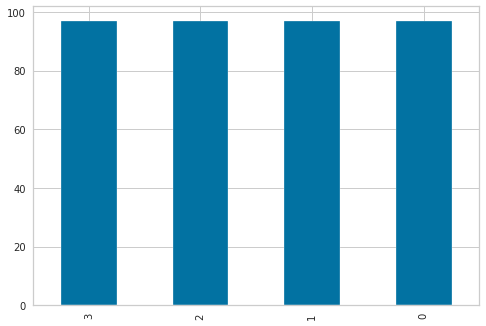

In [312]:
sns.set_style('whitegrid')
df_all_port_indexid['Target'].value_counts().plot(kind = 'bar')

In [313]:
#Criando o X e y
X = df_all_port_indexid.drop('Target', axis=1)
y = df_all_port_indexid['Target']

/home/luiz/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1657: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


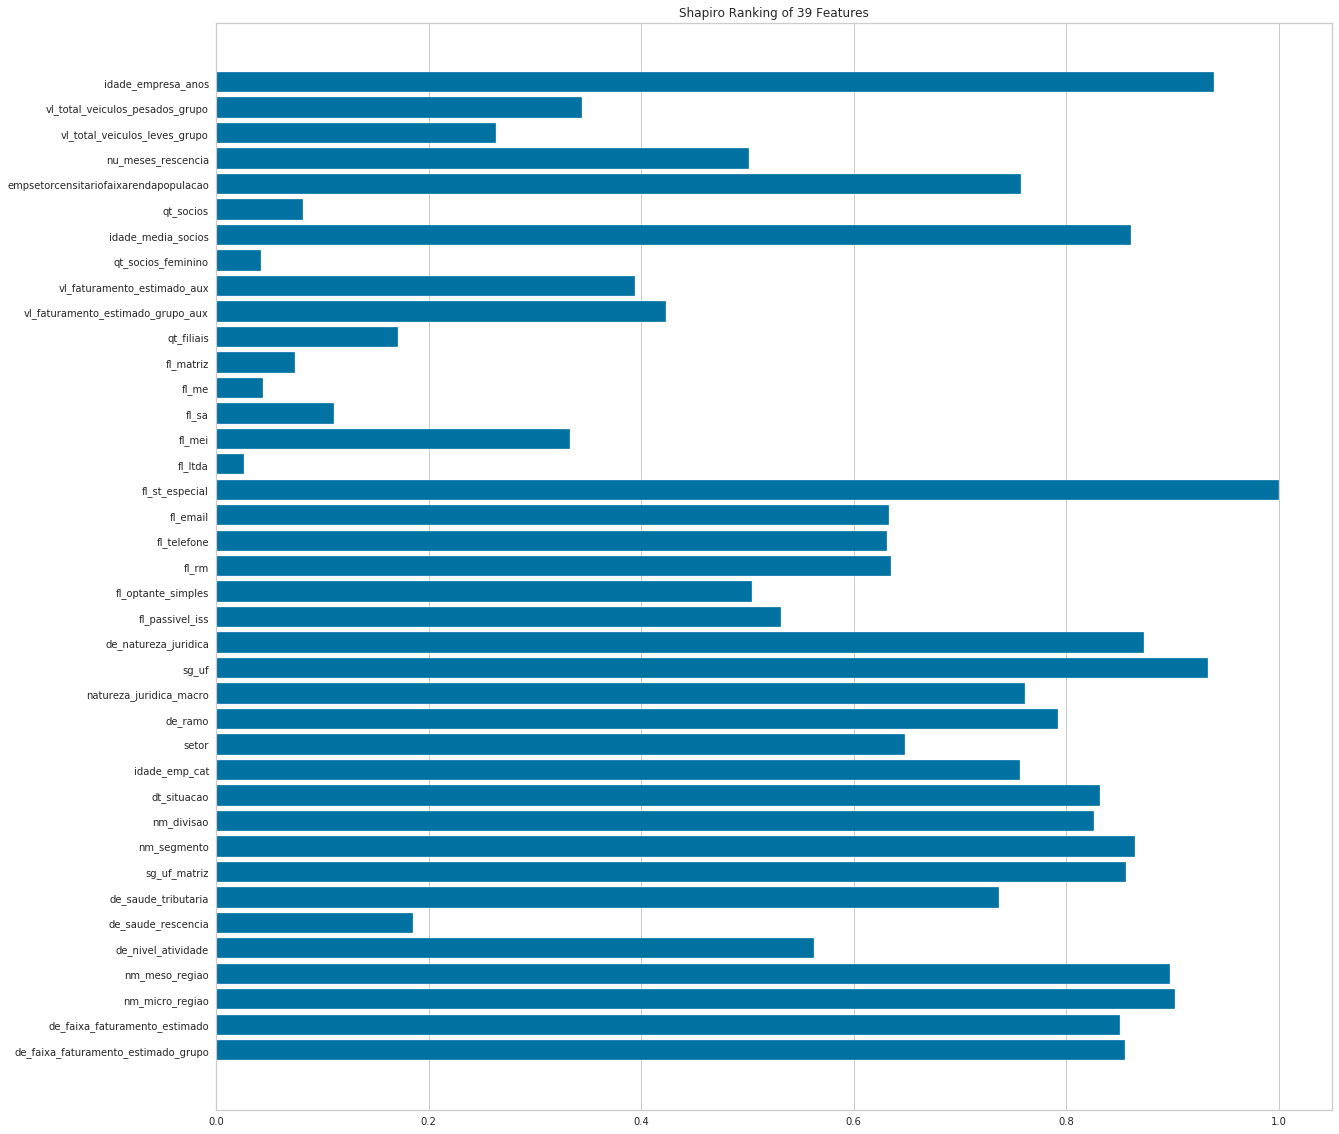

In [314]:
#Visualização da importancia das features usando Shapiro
from yellowbrick.features import Rank1D
# Criando o visualizador
visualizer = Rank1D(algorithm='shapiro')
plt.figure(figsize=(20,20))
visualizer.fit(X, y)           # Fit nos dados para o visualizer
visualizer.transform(X)        # Tranformando os dados
visualizer.show()              # Imprimindo as figuras

## Fazendo aprendizado supervisionado Classificação para aprender quem é do portfólio 1 e quem é do portfólio 2

### Separando a base em treino e teste

In [315]:
from sklearn.model_selection import train_test_split

In [316]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

## Balanceando com RandomOverSampler

In [216]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [317]:
from tpot import TPOTClassifier

In [318]:
tp = TPOTClassifier(generations=100, population_size=200, cv=5,
                                    random_state=42, verbosity=2)

In [319]:
tp.fit(X_train, y_train)

Generation 1 - Current best internal CV score: 0.7048861283643892
Generation 2 - Current best internal CV score: 0.7048861283643892
Generation 3 - Current best internal CV score: 0.7048861283643892
Generation 4 - Current best internal CV score: 0.7248861283643893
Generation 5 - Current best internal CV score: 0.7248861283643893

Best pipeline: DecisionTreeClassifier(input_matrix, criterion=entropy, max_depth=5, min_samples_leaf=18, min_samples_split=14)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=5,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=50,
               random_state=42, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

In [320]:
#exportanod o modelo
tp.export('modelo.py')
with open('modelo.py') as pipe:
    print("".join(pipe.readlines()))

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from tpot.export_utils import set_param_recursive

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=42)

# Average CV score on the training set was: 0.7248861283643893
exported_pipeline = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_leaf=18, min_samples_split=14)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)



In [321]:
from sklearn.tree import DecisionTreeClassifier
from tpot.export_utils import set_param_recursive

In [322]:
exported_pipeline = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_leaf=18, min_samples_split=14)


In [323]:
model = exported_pipeline.fit(X_train, y_train)
y_pred = exported_pipeline.predict(X_test)

## Curva ROC

/home/luiz/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


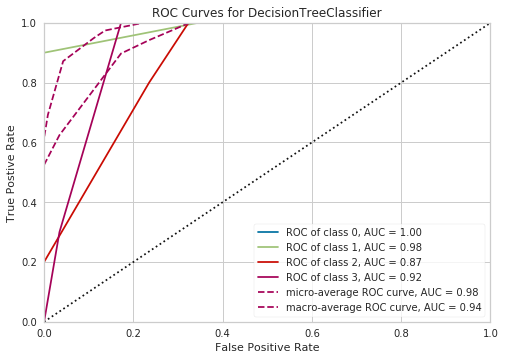

In [324]:
#Curva ROC e Area Abaixo da Curva
from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_spam

visualizer = ROCAUC(model)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

In [325]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [326]:
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.90      0.95        10
           2       1.00      0.20      0.33         5
           3       0.67      1.00      0.80        10

    accuracy                           0.87        39
   macro avg       0.92      0.78      0.77        39
weighted avg       0.91      0.87      0.85        39



In [327]:
confusion_matrix(y_pred=y_pred, y_true=y_test)

array([[14,  0,  0,  0],
       [ 0,  9,  0,  1],
       [ 0,  0,  1,  4],
       [ 0,  0,  0, 10]])

In [328]:
print("Acurácia (base de treinamento):", model.score(X_train, y_train))
print("Acurácia de previsão:", accuracy_score(y_test, y_pred))

Acurácia (base de treinamento): 0.7220630372492837
Acurácia de previsão: 0.8717948717948718


In [329]:
from sklearn.metrics import r2_score

In [330]:
print('R2 score: {:.2f}'.format(r2_score(y_test, y_pred)))

R2 score: 0.86


In [331]:
y_test.tail()

id
5e0dc52277e30c08cf1f616ee753fabc986b8c29710250a04b4c990f12ef5c92    0
0c17f91d6b8eb35fab6d843a7ed0a43b924095bef24c826ac1f0b9d08d54627d    1
cdbe1d8ae7a9c080dc025b1b33ad91f097858def5c889d3bf562a1fb59060005    0
59c5648b89161593f4d98cbc9df5371382d986e885a9c77d81404c2a47a92494    3
160046e34dae0f72ad2ba2d27828806691d299f058dc1542b3559a586d10c053    0
Name: Target, dtype: int64

In [332]:
y_pred

array([3, 0, 1, 0, 3, 1, 1, 0, 3, 1, 3, 3, 1, 0, 3, 1, 0, 2, 0, 0, 3, 1,
       0, 1, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0, 1, 0, 3, 0])

## Prevendo agora no market com a amostra tirada também do portfólio 1

In [333]:
amostra_port1.head()

,id,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais,fl_matriz,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,fl_optante_simples,fl_passivel_iss,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_emp_cat,dt_situacao,nm_divisao,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo
487,9654c40f979150a393a80d6356fe72d2f138f4a1a52db2...,-0.934055,-0.049577,-0.040442,-1.741135e+00,-7.799060e-01,2.345859e-16,0.010406,0.000000,-0.019695,-0.048772,-0.061322,1,0,0,0,0,0,1,1,0,1,0,17,3,5,5,1,4,6991,30,9,16,2,1,1,12,51,10,10
488,dc1827198539361b91487caaa8dc1ae44e9a898aec36c9...,1.684392,-0.049577,-0.040442,-2.183315e-01,-6.920441e-01,1.773739e-01,2.728646,-0.227621,-0.019695,-0.048711,-0.057054,0,0,0,0,0,0,0,0,0,0,0,60,2,2,5,1,5,2901,30,9,9,4,0,2,3,44,10,7
489,46aaa98df3866260f26c7c0cd7dc892235d608041c1aca...,-0.802706,-0.049577,-0.040442,3.864345e-16,6.257910e-01,2.345859e-16,0.010406,0.000000,-0.019695,-0.048742,-0.059188,0,0,0,0,0,0,0,1,1,1,0,17,2,5,5,1,0,6536,30,9,9,2,4,1,8,0,10,7
490,7b31a8c2bf7011c7928cffb9f8225075e7ec2d638ce94e...,0.378017,-0.049577,-0.040442,-1.095599e-01,3.206583e-14,-1.747865e-01,0.010406,0.000000,-0.019695,-0.048772,-0.061322,1,0,0,0,0,0,0,0,0,1,0,17,5,5,5,1,1,2714,30,9,20,3,0,1,19,73,10,10
491,aeb22f0dffd6635c319d3de4e465d045b827b1ae490d84...,-0.337141,-0.049577,-0.040442,-1.095599e-01,-3.020733e-01,1.773739e-01,0.128755,0.000000,-0.019695,-0.048772,-0.061322,1,0,0,0,0,0,1,1,1,1,0,60,2,2,5,1,3,4923,30,9,9,1,0,2,10,30,10,10


In [334]:
amostra_port1_indexid = amostra_port1.copy()
amostra_port2_indexid = amostra_port2.copy()
amostra_port3_indexid = amostra_port3.copy()
amostra_port4_indexid = amostra_port4.copy()

In [335]:
amostra_port1_indexid.set_index('id', inplace=True)
amostra_port2_indexid.set_index('id', inplace=True)
amostra_port3_indexid.set_index('id', inplace=True)
amostra_port4_indexid.set_index('id', inplace=True)

In [336]:
merge_not.head()

,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais,fl_matriz,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,fl_optante_simples,fl_passivel_iss,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_emp_cat,dt_situacao,nm_divisao,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,id
0,0.468908,-0.049577,-0.040442,-0.218332,3.206583e-14,0.177374,0.128755,0.0,0.077506,-0.048349,-0.061322,1,0,0,0,0,0,1,1,1,1,1,60,4,2,11,2,1,2709,32,10,19,4,0,0,6,48,2,2,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...
1,-0.882484,-0.049577,-0.040442,-1.741135,-8.700907e-01,-0.174786,-1.571173,0.0,-0.019695,-0.048772,-0.061322,1,0,0,1,0,0,1,1,1,1,1,17,3,5,21,4,0,6811,3,3,16,2,1,1,4,69,10,10,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...
2,-0.296966,-0.049577,-0.040442,0.107983,-6.164806e-01,-0.174786,-1.071194,0.0,-0.025017,-0.048795,-0.061322,1,0,0,1,0,0,0,1,1,1,1,17,1,5,32,4,3,4783,86,20,2,0,0,2,2,43,1,1,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...
3,-0.357370,-0.049577,-0.040442,0.107983,-8.630394e-01,-0.174786,-0.671211,0.0,-0.019695,-0.048772,-0.061322,1,0,0,0,0,0,1,1,1,1,1,17,1,5,25,4,3,4994,74,17,2,0,0,2,2,43,10,10,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...
4,-0.701843,-0.049577,-0.040442,0.216755,1.623920e+00,-0.174786,0.010406,0.0,-0.019695,-0.048772,-0.061322,1,0,0,0,0,0,1,1,1,1,1,17,4,5,27,4,0,6183,77,8,19,4,0,0,6,48,10,10,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...


In [337]:
just_market_indexid = merge_not.copy()

In [338]:
just_market_indexid.set_index('id', inplace=True)

In [339]:
base_test_all_port= pd.concat([amostra_port1_indexid,amostra_port2_indexid,amostra_port3_indexid,amostra_port4_indexid, just_market_indexid],axis=0)

In [340]:
base_test_all_port.shape

(461214, 39)

In [341]:
amostra_port2_indexid.shape

(58, 39)

In [342]:
X_test_base = base_test_all_port

In [343]:
y_pred_test = exported_pipeline.predict(X_test_base)

In [344]:
pd.DataFrame(y_pred_test)[0].value_counts()

0    458501
1      2116
3       470
2       127
Name: 0, dtype: int64

## Criando um y_test com as amostras para ver a acurácia 

In [345]:
amostra_port1_indexid_target = amostra_port1_indexid.copy()
amostra_port2_indexid_target = amostra_port2_indexid.copy()
amostra_port3_indexid_target = amostra_port3_indexid.copy()
amostra_port4_indexid_target = amostra_port4_indexid.copy()

In [346]:
amostra_port1_indexid_target['Target'] = 0
amostra_port2_indexid_target['Target'] = 1
amostra_port3_indexid_target['Target'] = 2
amostra_port4_indexid_target['Target'] = 3

In [347]:
base_y_test_all_port = pd.concat([amostra_port1_indexid_target,amostra_port2_indexid_target,amostra_port3_indexid_target,amostra_port4_indexid_target],axis=0)

In [348]:
base_y_test_all_port.head()

,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais,fl_matriz,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,fl_optante_simples,fl_passivel_iss,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_emp_cat,dt_situacao,nm_divisao,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,Target
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9654c40f979150a393a80d6356fe72d2f138f4a1a52db2fa5e2a6f8e8b932dc3,-0.934055,-0.049577,-0.040442,-1.741135e+00,-7.799060e-01,2.345859e-16,0.010406,0.000000,-0.019695,-0.048772,-0.061322,1,0,0,0,0,0,1,1,0,1,0,17,3,5,5,1,4,6991,30,9,16,2,1,1,12,51,10,10,0
dc1827198539361b91487caaa8dc1ae44e9a898aec36c9b93e6f27e394c975a6,1.684392,-0.049577,-0.040442,-2.183315e-01,-6.920441e-01,1.773739e-01,2.728646,-0.227621,-0.019695,-0.048711,-0.057054,0,0,0,0,0,0,0,0,0,0,0,60,2,2,5,1,5,2901,30,9,9,4,0,2,3,44,10,7,0
46aaa98df3866260f26c7c0cd7dc892235d608041c1aca5ada1d57b1e1d8f031,-0.802706,-0.049577,-0.040442,3.864345e-16,6.257910e-01,2.345859e-16,0.010406,0.000000,-0.019695,-0.048742,-0.059188,0,0,0,0,0,0,0,1,1,1,0,17,2,5,5,1,0,6536,30,9,9,2,4,1,8,0,10,7,0
7b31a8c2bf7011c7928cffb9f8225075e7ec2d638ce94e09dbc0032aacaef953,0.378017,-0.049577,-0.040442,-1.095599e-01,3.206583e-14,-1.747865e-01,0.010406,0.000000,-0.019695,-0.048772,-0.061322,1,0,0,0,0,0,0,0,0,1,0,17,5,5,5,1,1,2714,30,9,20,3,0,1,19,73,10,10,0
aeb22f0dffd6635c319d3de4e465d045b827b1ae490d844ddb749c616b78807f,-0.337141,-0.049577,-0.040442,-1.095599e-01,-3.020733e-01,1.773739e-01,0.128755,0.000000,-0.019695,-0.048772,-0.061322,1,0,0,0,0,0,1,1,1,1,0,60,2,2,5,1,3,4923,30,9,9,1,0,2,10,30,10,10,0


In [349]:
base_y_test_all_port.shape

(194, 40)

In [352]:
y_pred_test_test = pd.DataFrame(y_pred_test, columns = ['Target'])[:194]

In [353]:
print("Acurácia de previsão:", accuracy_score(base_y_test_all_port['Target'], y_pred_test_test['Target']))

Acurácia de previsão: 0.6855670103092784
